<a href="https://colab.research.google.com/github/NikaMasa51/test_project/blob/master/notebook/weed_VGG16_fine_tuning_cls09_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

■グーグルドライブをマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


■解凍したファイルをそれぞれ訓練データと検証用のデータに分けます

ディレクトリを作成

In [7]:
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = "./cluster09"
# os.mkdir(original_dataset_dir)

# The directory where we will
# store our smaller dataset
base_dir = "./CLS09"
if "CLS09" not in os.listdir("./"):
  os.mkdir(base_dir)
else:
  print(base_dir, "は既に存在します")


for i in range(3):
  # Directories for our training,
  # validation (and test) splits
  train_index = "train" + str(i+1)
  train_dir = os.path.join(base_dir, train_index)
  if train_index not in os.listdir(base_dir):
    os.mkdir(train_dir)
  else:
    print(train_dir + "は既に存在します")
  validation_index = "validation" + str(i+1)
  validation_dir = os.path.join(base_dir, validation_index)
  if validation_index not in os.listdir(base_dir):
    os.mkdir(validation_dir)
  else:
    print(validation_dir + "は既に存在します")
  # test_dir = os.path.join(base_dir, 'test')
  # os.mkdir(test_dir)

#3分類のclassを入力
weeds=["grass","vine","broad"]
dirs = os.listdir(base_dir)
for weed in weeds:
  for dir in dirs:
    # Directory with our training pictures
    weed_dir = os.path.join(base_dir, dir, weed)
    if weed not in os.listdir(base_dir + "/" + dir):
      os.mkdir(weed_dir)
    else:
      print(weed_dir, "は既に存在します")


./CLS09 は既に存在します
./CLS09/train1は既に存在します
./CLS09/validation1は既に存在します
./CLS09/train2は既に存在します
./CLS09/validation2は既に存在します
./CLS09/train3は既に存在します
./CLS09/validation3は既に存在します
./CLS09/train2/grass は既に存在します
./CLS09/validation3/grass は既に存在します
./CLS09/validation1/grass は既に存在します
./CLS09/validation2/grass は既に存在します
./CLS09/train3/grass は既に存在します
./CLS09/train1/grass は既に存在します
./CLS09/train2/vine は既に存在します
./CLS09/validation3/vine は既に存在します
./CLS09/validation1/vine は既に存在します
./CLS09/validation2/vine は既に存在します
./CLS09/train3/vine は既に存在します
./CLS09/train1/vine は既に存在します
./CLS09/train2/broad は既に存在します
./CLS09/validation3/broad は既に存在します
./CLS09/validation1/broad は既に存在します
./CLS09/validation2/broad は既に存在します
./CLS09/train3/broad は既に存在します
./CLS09/train1/broad は既に存在します


クラス作成のために品種の名前を定義

In [0]:
# クラス作成用の品種の名前を定義
classes = {"hakidamegiku":"broad","hosoaogeitou":"broad","ichibi":"broad",
         "inubie":"grass","kosendangusa":"broad","mameasagao":"vine",
         "mehishiba":"grass","ohishiba":"grass","oinutade":"broad","shiroza":"broad"}



イネ科のディレクトリを作成し画像をランダムに振り分け

In [0]:
from os.path import join
import random

clsdir = "./drive/My Drive/cluster09"
base_dir = "./CLS09"
tra_val_dirs = os.listdir(base_dir)

weed_names = os.listdir(clsdir)
# ファイル（クラスごとに分かれている）を順番に読み取り
# grass
for tra_val_dir in tra_val_dirs:
  for weed_name in weed_names:
    if classes[weed_name] == "grass": 
      print(weed_name)
      file_names = os.listdir(os.path.join(clsdir, weed_name))
      files30 = random.sample(file_names, int(30))
      for file_name in file_names:
        if  file_name in files30:
          # 移動元のファイル
          path1 = os.path.join(clsdir, weed_name, file_name)
          # 移動先のファイル
          path2= os.path.join(base_dir, tra_val_dir, classes[weed_name], file_name)
          # ファイルを移動
          new_path = shutil.copy(path1, path2)
          # ファイルの存在確認
          print(os.path.exists(path2))


ohishiba
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
mehishiba
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
inubie
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
ohishiba
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
mehishiba
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
inubie
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
ohishiba
True
True
True
True
True
True
True
True

マメアサガオのディレクトリを作成し画像をランダムに振り分け

In [0]:
from os.path import join
import random

clsdir = "./drive/My Drive/cluster09"
base_dir = "./CLS09"
tra_val_dirs = os.listdir(base_dir)

weed_names = os.listdir(clsdir)
# ファイル（クラスごとに分かれている）を順番に読み取り
# vine
for tra_val_dir in tra_val_dirs:
  if tra_val_dir == "train1": 
    for weed_name in weed_names:
      if classes[weed_name] == "vine": 
        print(weed_name)
        file_names = os.listdir(os.path.join(clsdir, weed_name))
        files100 = random.sample(file_names, int(100))
        num1 = 0
        num2 = 0
        for file_name in file_names:
          if  file_name in files100:
            if num1 >= 90:
              continue
            # 移動元のファイル
            path1 = os.path.join(clsdir, weed_name, file_name)
            # 移動先のファイル
            path2= os.path.join(base_dir, "train1", classes[weed_name], file_name)
            # ファイルを移動
            new_path = shutil.copy(path1, path2)
            # ファイルの存在確認
            print(os.path.exists(path2))
            num1 = num1 + 1
          else:
            if num2 >= 90:
              continue 
            # 移動元のファイル
            path1 = os.path.join(clsdir, weed_name, file_name)
            # 移動先のファイル
            path2= os.path.join(base_dir, "validation1", classes[weed_name], file_name)
            # ファイルを移動
            new_path = shutil.copy(path1, path2)
            # ファイルの存在確認
            print(os.path.exists(path2))
            num2 = num2 + 1

for j in range(2):
    # コピー元のディレクトリ
    path1 = os.path.join(base_dir, "train" + str(j+1), "vine")
    files = os.listdir(path1)
    # コピー先のディレクトリ
    path2= os.path.join(base_dir, "train" + str(j+2), "vine")
    num_files = len(files)  # 進捗表示用
    n = 0  # 進捗表示用
    for fname in files:
      shutil.copy(os.path.join(path1, fname), path2, follow_symlinks=True)  # デフォルトTrueですが一応
    
for j in range(2):
    # コピー元のディレクトリ
    path1 = os.path.join(base_dir, "validation" + str(j+1), "vine")
    files = os.listdir(path1)
    # コピー先のディレクトリ
    path2= os.path.join(base_dir, "validation" + str(j+2), "vine")
    num_files = len(files)  # 進捗表示用
    n = 0  # 進捗表示用
    for fname in files:
      shutil.copy(os.path.join(path1, fname), path2, follow_symlinks=True)  # デフォルトTrueですが一応
   


mameasagao
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


広葉雑草のディレクトリを作成し画像をランダムに振り分け

In [0]:
from os.path import join
import random

clsdir = "./drive/My Drive/cluster09"
base_dir = "./CLS09"
tra_val_dirs = os.listdir(base_dir)

weed_names = os.listdir(clsdir)
# ファイル（クラスごとに分かれている）を順番に読み取り
# broad
for tra_val_dir in tra_val_dirs:
  for weed_name in weed_names:
    if classes[weed_name] == "broad": 
      print(weed_name)
      file_names = os.listdir(os.path.join(clsdir, weed_name))
      files180 = random.sample(file_names, int(15))
      for file_name in file_names:
        if  file_name in files180:
          # 移動元のファイル
          path1 = os.path.join(clsdir, weed_name, file_name)
          # 移動先のファイル
          path2= os.path.join(base_dir, tra_val_dir, classes[weed_name], file_name)
          # ファイルを移動
          new_path = shutil.copy(path1, path2)
          # ファイルの存在確認
          print(os.path.exists(path2))


hakidamegiku
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
oinutade
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
hosoaogeitou
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
kosendangusa
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
ichibi
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
shiroza
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
hakidamegiku
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
oinutade
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
hosoaogeitou
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
kosendangusa
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
ichibi
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
shiroza
True
True
True
True
True
True
True
True
True
True

■解凍したファイルをそれぞれ訓練データと検証用のデータに分けます

In [0]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image

input_size = 224

train_dir1 = "./CLS09/train1"
train_dir2 = "./CLS09/train2"
train_dir3 = "./CLS09/train3"
validation_dir1 = "./CLS09/validation1"
validation_dir2 = "./CLS09/validation2"
validation_dir3 = "./CLS09/validation3"


train_datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            rescale=1./255
        )

val_datagen = Image.ImageDataGenerator(rescale=1./255)



train_generator1 = train_datagen.flow_from_directory(
            train_dir1,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

train_generator2 = train_datagen.flow_from_directory(
            train_dir2,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

train_generator3 = train_datagen.flow_from_directory(
            train_dir3,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

validation_generator1 = val_datagen.flow_from_directory(
            validation_dir1,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

validation_generator2 = val_datagen.flow_from_directory(
            validation_dir2,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

validation_generator3 = val_datagen.flow_from_directory(
            validation_dir3,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )


Using TensorFlow backend.


Found 270 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 270 images belonging to 3 classes.


■cluster09のtrain1～train3をアンサンブル学習

In [0]:

#ファインチューニング+VGG+水増し。ここから実行してOK（VGG16をダウンロード）
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.applications import VGG16
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import History, Callback
from keras.objectives import categorical_crossentropy
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.utils import to_categorical
from scipy.stats import mode
import os, pickle


def create_cnn():
  input_size=224
  #input_sizeは224,224までOK。

  vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(input_size,input_size, 3))
  last = vgg_conv.output

  vgg_conv.trainable = True

  set_trainable = False
  for layer in vgg_conv.layers:
    if layer.name == 'block5_conv1':
      set_trainable = True
    if set_trainable:
      layer.trainable = True
    else:
      layer.trainable = False

  mod = Flatten()(last)
  mod = Dense(256, activation='relu')(mod)
  #mod = Dropout(0.5)(mod)
  preds = Dense(3, activation='softmax')(mod)

  model = models.Model(vgg_conv.input, preds)

  return model


アンサンブルの手法を定義(soft or hard)

In [0]:
# 確率の平均を取るアンサンブル（ソフトアンサンブル）
def ensembling_soft(models, X):
    preds_sum = None
    for model in models:
        if preds_sum is None:
            preds_sum = model.predict_generator(X)
        else:
            preds_sum += model.predict_generator(X)
    probs = preds_sum / len(models)
    return np.argmax(probs, axis=-1)

# 多数決のアンサンブル（ハードアンサンブル）
def ensembling_hard(models, X):
    pred_labels = np.zeros((X.shape[0], len(models)))
    for i, model in enumerate(models):
        pred_labels[:, i] = np.argmax(model.predict_generator(X), axis=-1)
    return np.ravel(mode(pred_labels, axis=-1)[0])


チェックポイントを定義(val lossが一番低い値の時にweightを保存)

In [0]:
class Checkpoint(Callback):
    def __init__(self, model, filepath):
        self.model = model
        self.filepath = filepath
        self.best_val_acc = 0.0
        self.best_val_loss = 0.1

    def on_epoch_end(self, epoch, logs):
        # val_accuracyが最大の時ににweightを保存する
        # if self.best_val_acc < logs["val_accuracy"]:
        #     self.model.save_weights(self.filepath)
        #     self.best_val_acc = logs["val_accuracy"]
        #     print("Weights saved.", self.best_val_acc)

        # val_lossが最小の時ににweightを保存する
        if self.best_val_loss > logs["val_loss"]:
            self.model.save_weights(self.filepath)
            self.best_val_loss = logs["val_loss"]
            print("Weights saved.", self.best_val_loss)
        # print(epoch + 1)

        # epochの最後にweightを保存する
        # if epoch == 99:
        #   print("epoch equals ", epoch)
        #   self.model.save_weights(self.filepath)
        #   self.best_val_loss = logs["val_loss"]
        #   print("Weights saved.", self.best_val_loss)

モデルを実行してアンサンブル学習させていきます

In [0]:
def train(ensemble_type):
    assert ensemble_type in ["hard", "soft"]

    train_generator = [train_generator1, train_generator2, train_generator3]
    
    n_estimators = 3
    models = []
    global_hist = {"hists":[], "ensemble_test":[]}
    single_preds = np.zeros((270, n_estimators))
    for i in range(n_estimators):
        print("Estimator",i+1,"train starts")
        train_model = create_cnn()
        train_model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

        models.append(train_model)

        hist = History()
        cp = Checkpoint(train_model, f"weights_{i}.hdf5")
        train_model.fit_generator(train_generator[i],epochs=100,validation_data=validation_generator1,callbacks=[hist, cp])      

        # 最良のモデルの読み込み
        train_model.load_weights(f"weights_{i}.hdf5")
        for layer in train_model.layers:
            layer.trainable = False

        # 単体の推論
        single_preds[:, i] = np.argmax(train_model.predict_generator(validation_generator2), axis=-1)

        # アンサンブルの精度の記録
        global_hist["hists"].append(hist.history)
        if ensemble_type == "soft":
            ensemble_test_pred = ensembling_soft(models, validation_generator2)
        else:
            ensemble_test_pred = ensembling_hard(models, validation_generator2)
        ensemble_test_acc = accuracy_score(validation_generator2.classes[validation_generator2.index_array], ensemble_test_pred)

        global_hist["ensemble_test"].append(ensemble_test_acc)
        print("Current Ensemble Test Accuracy : ", ensemble_test_acc)

    print(len(single_preds))
    global_hist["corrcoef"] = np.corrcoef(single_preds, rowvar=False)
    print("Corr Matrix on each estimators (Test)")
    print(global_hist["corrcoef"])

    with open(f"ensemble_{ensemble_type}.dat", "wb") as fp:
        pickle.dump(global_hist, fp)
    print('histのタイプは',type(global_hist))
    return global_hist




In [0]:
K.clear_session()
hist = train("soft")

Estimator 1 train starts
Epoch 1/10
27/27 [==============================] - 6s 224ms/step - loss: 1.0287 - accuracy: 0.4741 - val_loss: 0.5740 - val_accuracy: 0.8259
Epoch 2/10
27/27 [==============================] - 5s 188ms/step - loss: 0.5935 - accuracy: 0.8148 - val_loss: 0.2261 - val_accuracy: 0.9259
Epoch 3/10
27/27 [==============================] - 5s 193ms/step - loss: 0.3634 - accuracy: 0.8593 - val_loss: 0.6679 - val_accuracy: 0.9185
Epoch 4/10
27/27 [==============================] - 5s 189ms/step - loss: 0.2154 - accuracy: 0.9370 - val_loss: 0.1751 - val_accuracy: 0.9407
Epoch 5/10
27/27 [==============================] - 5s 195ms/step - loss: 0.1575 - accuracy: 0.9556 - val_loss: 0.0091 - val_accuracy: 0.9593
Weights saved. 0.009068752638995647
Epoch 6/10
27/27 [==============================] - 5s 184ms/step - loss: 0.1354 - accuracy: 0.9444 - val_loss: 0.0677 - val_accuracy: 0.9556
Epoch 7/10
27/27 [==============================] - 5s 192ms/step - loss: 0.1016 - accu

■学習した分類器を単体で検証

weightをロードして単体で検証します

In [0]:
def sin_predict(ensemble_type):
    assert ensemble_type in [0, 1, 2]
  
    print("Estimator",ensemble_type+1,"train starts")
    train_model = create_cnn()
    train_model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

    # 最良のモデルの読み込み
    train_model.load_weights(f"weights_{int(ensemble_type)}.hdf5")
    for layer in train_model.layers:
        layer.trainable = False

    # 単体の推論
    single_preds = np.argmax(train_model.predict_generator(validation_generator2), axis=-1)

    # 推論のスコア
    ensemble_test_acc = accuracy_score(validation_generator2.classes[validation_generator2.index_array], single_preds)

    print("Current Ensemble Test Accuracy : ", ensemble_test_acc)


In [0]:
print(hist['hists'][2]['accuracy'])

[0.6111111, 0.82592595, 0.8888889, 0.91481483, 0.9296296, 0.9592593, 0.962963, 0.95185184, 0.93333334, 0.9777778]


正解率と損失率をグラフ化(train1)

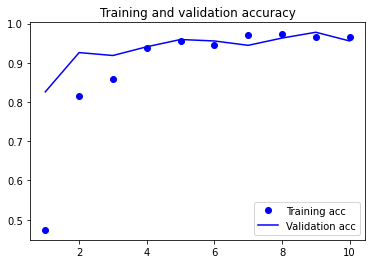

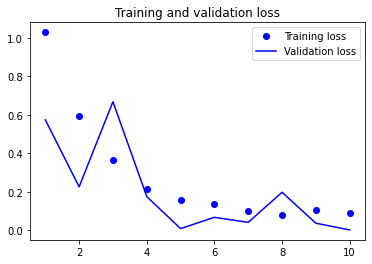

In [0]:
import matplotlib.pyplot as plt

history = hist["hists"][0]

acc=history['accuracy']
val_acc=history['val_accuracy']
loss=history['loss']
val_loss=history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
# 単体の推論(train1)
sin_predict(0)

Estimator 1 train starts
Current Ensemble Test Accuracy :  0.9666666666666667


正解率と損失率をグラフ化(train2)

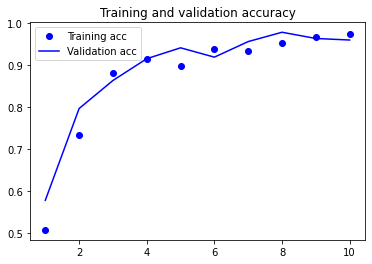

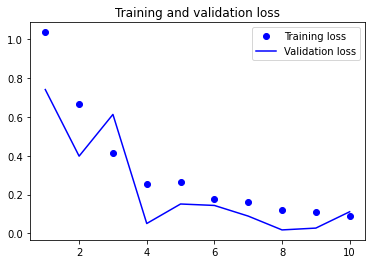

In [0]:
import matplotlib.pyplot as plt

history = hist["hists"][1]

acc=history['accuracy']
val_acc=history['val_accuracy']
loss=history['loss']
val_loss=history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
# 単体の推論(train2)
sin_predict(1)

Estimator 2 train starts
Current Ensemble Test Accuracy :  0.9740740740740741


正解率と損失率をグラフ化(train3)

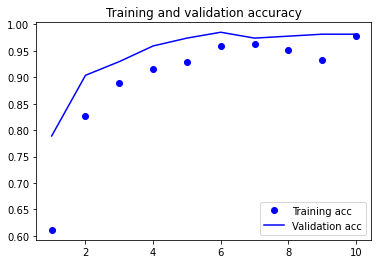

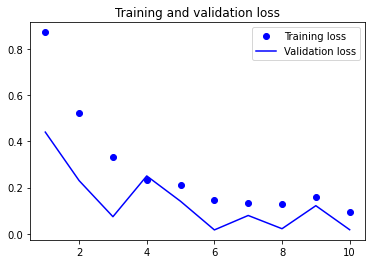

In [0]:
import matplotlib.pyplot as plt

history = hist["hists"][2]

acc=history['accuracy']
val_acc=history['val_accuracy']
loss=history['loss']
val_loss=history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
# 単体の推論(train3)
sin_predict(2)

Estimator 3 train starts
Current Ensemble Test Accuracy :  0.9740740740740741
